# FFT Phase Correlation

In [19]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io
from skimage import filters
from skimage.color import rgb2gray
from skimage.filters import window, difference_of_gaussians

import scipy 

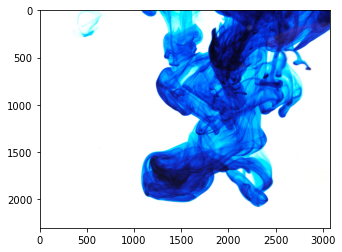

In [31]:
frame = skimage.io.imread('fluid.jpg')

plt.imshow(frame)
plt.show()

In [32]:
frame.shape

(2304, 3072, 3)

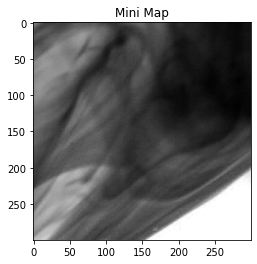

In [33]:
img1 = rgb2gray(frame[:300,-300:,::-1])
plt.title('Mini Map')
plt.imshow(img1,cmap='gray')
plt.show()

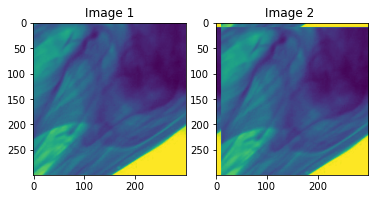

In [34]:
def shift_image(shift_x,shift_y, img):

    #Shift the img1 10 pixels to the right and 20 pixels down.
    translated = np.roll(img, shift_y, axis=0)
    img2 = np.roll(translated, shift_x, axis=1)

    fig, axes = plt.subplots(1, 2)
    ax = axes.ravel()
    ax[0].set_title("Image 1")
    ax[0].imshow(img)
    ax[1].set_title("Image 2 ")
    ax[1].imshow(img2)
    plt.show()
    return img2

img2 = shift_image(shift_x=10,shift_y=10, img=img1)

# Finding the shift

Apply a window function (e.g., a Hamming window) on both images to reduce edge effects.

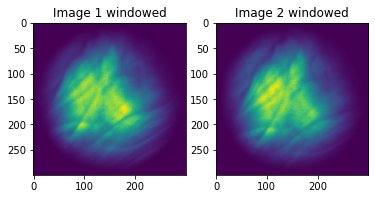

In [35]:
def reduce_edge_effects(img1,img2):
    img1_wimage = img1 * window('hann', img1.shape)
    img2_wimage = img2 * window('hann', img2.shape)

    fig, axes = plt.subplots(1, 2)
    ax = axes.ravel()
    ax[0].set_title("Image 1 windowed")
    ax[0].imshow(img1_wimage)
    ax[1].set_title("Image 2 windowed")
    ax[1].imshow(img2_wimage)
    plt.show()
    return img1_wimage,img2_wimage

img1_wimage,img2_wimage = reduce_edge_effects(img1,img2)

In [36]:
def get_fft_shift(img1,img2):
    # Calculate the discrete 2D Fourier transform of both images.
    img1_fs = np.fft.fft2(img1)
    img2_fs = np.fft.fft2(img2)
    # Calculate the cross-power spectrum by taking the complex conjugate of the second result, 
    # multiplying the Fourier transforms together elementwise, and normalizing this product elementwise.
    cross_power_spectrum = (img1_fs * img2_fs.conj()) / np.abs(img1_fs * img2_fs.conj())
    # inverse
    r = np.abs(np.fft.ifft2(cross_power_spectrum))
    r = np.fft.fftshift(r)
    [py,px] = np.argwhere(r==r.max())[0]
    cx,cy = img2.shape[0]//2,img2.shape[1]//2
    shift_x = cx - px
    shift_y = cy - py
    print(f'Shift measured X:{shift_x}, Y:{shift_y}')
    return shift_x,shift_y

get_fft_shift(img1_wimage,img2_wimage)

Shift measured X:10, Y:10


(10, 10)

For small window and small shift, results are accurate

# Try with a larger image window

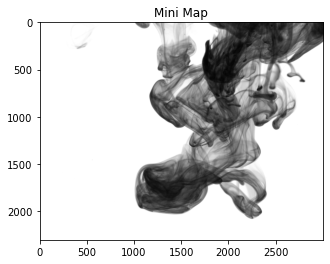

In [37]:
img1 = rgb2gray(frame[:3000,-3000:,::-1])
plt.title('Mini Map')
plt.imshow(img1,cmap='gray')
plt.show()

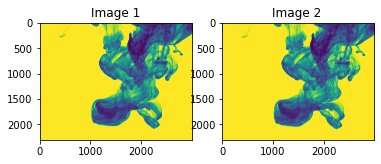

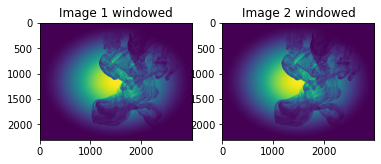

Shift measured X:-338, Y:358


(-338, 358)

In [38]:
img2 = shift_image(shift_x=10,shift_y=10, img=img1)
img1_wimage,img2_wimage = reduce_edge_effects(img1,img2)
get_fft_shift(img1_wimage,img2_wimage)

For bigger window and small shift, results are not accurate

# Try with a smaller window but bigger shift

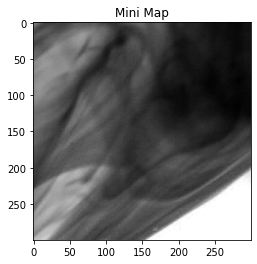

In [39]:
img1 = rgb2gray(frame[:300,-300:,::-1])
plt.title('Mini Map')
plt.imshow(img1,cmap='gray')
plt.show()

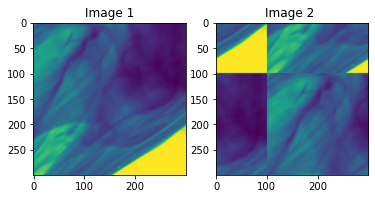

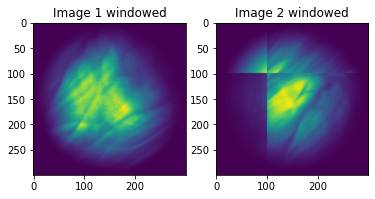

Shift measured X:100, Y:100


(100, 100)

In [40]:
img2 = shift_image(shift_x=100,shift_y=100, img=img1)
img1_wimage,img2_wimage = reduce_edge_effects(img1,img2)
get_fft_shift(img1_wimage,img2_wimage)

Results are still accurate even with bigger shift

In [24]:
import importlib
import utils
importlib.reload(utils)
from utils import *

import OF_plume.OF_algo
importlib.reload(OF_plume.OF_algo)
from OF_plume.OF_algo import *

In [3]:
frame = skimage.io.imread(r'pics/fluid.jpg')
frame.shape

(2304, 3072, 3)

(700, 700, 295)


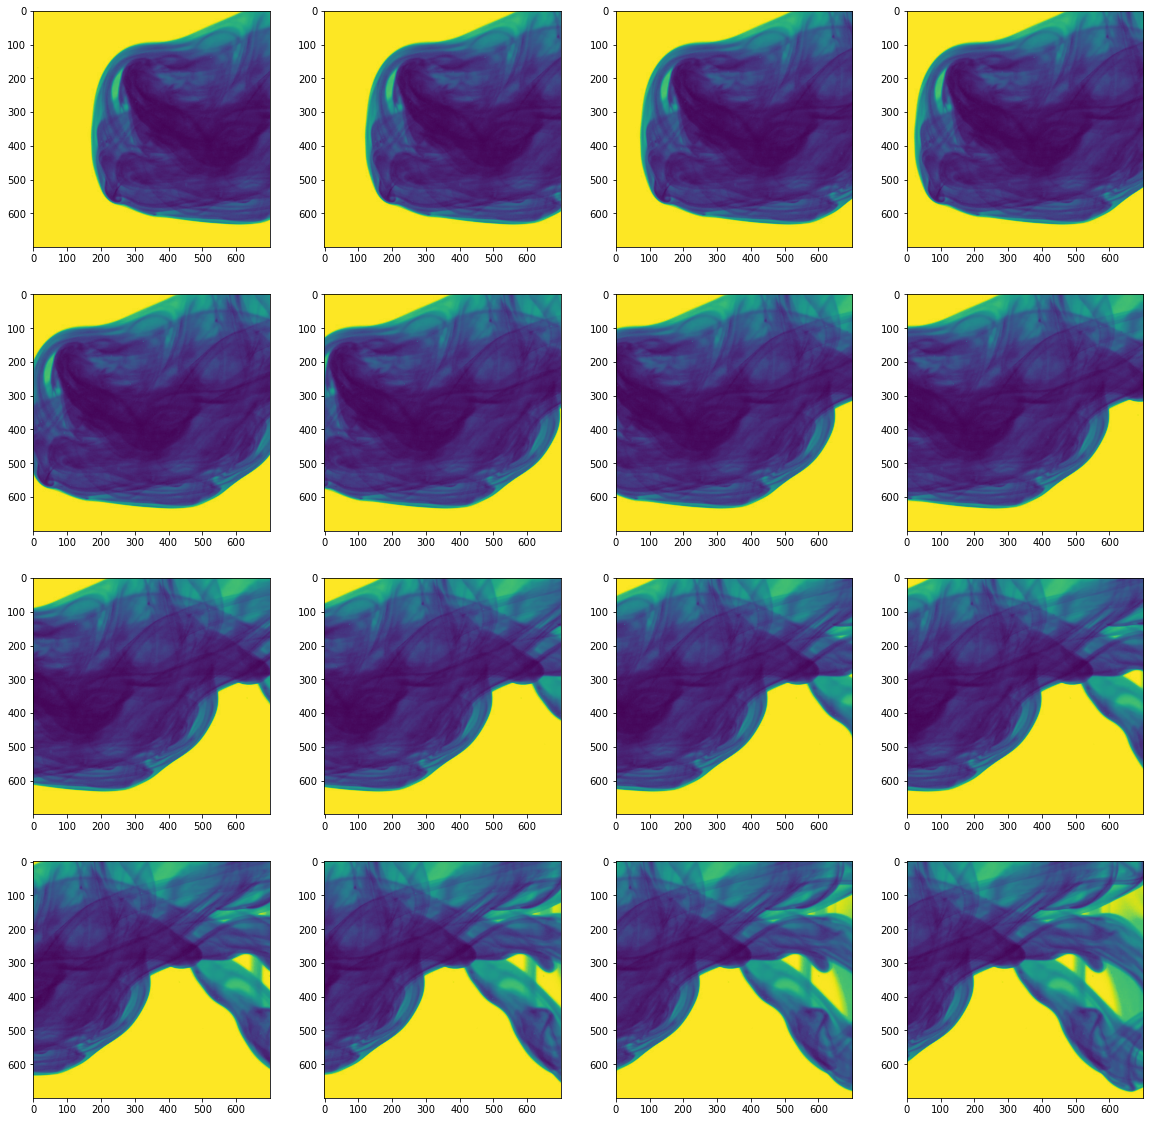

In [4]:
im_stack, coord_list = shift_images(shift_x=5,shift_y=0,frame=frame,dim=700,x0=900,y0=1400)
print(im_stack.shape)
show_image_sequence(im_stack,step_size=10)

In [5]:
binary_stack = binarize_obj(im_stack)

In [14]:
get_fft_shift(binary_stack[:,:,140],binary_stack[:,:,160])

Shift measured X:-100, Y:0


(-100, 0)

results are very accurate with binary images even with big windows and big shifts

In [28]:
pyr_dict = image_pyramid(binary_stack[:,:,140],3)

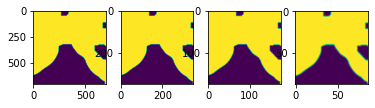

In [29]:
fig,ax = plt.subplots(1,4)
for i in range(4):
    ax[i].imshow(pyr_dict[i])

plt.show()